In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 

from fnmatch import fnmatch


import matplotlib.pyplot as plt


# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (20, 10)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.read_csv('../data/MaterialInputDataMachineLearning.txt', delim_whitespace=True, header=None)
result = pd.read_csv('../data/OutputDataMachineLearning.txt', delim_whitespace=True, header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,1,9.744375e+09,0.356487,5.266641e+11,0.279271,0.03,0.3
1,2,6.488627e+09,0.302243,1.232113e+11,0.137124,0.03,0.3
2,3,1.963719e+09,0.330547,4.588572e+11,0.315956,0.03,0.3
3,4,9.960097e+09,0.382041,1.455963e+11,0.123606,0.03,0.3
4,5,6.437510e+09,0.348520,8.645652e+11,0.129599,0.03,0.3


In [4]:
data = data[[1,2,3,4,6]]

In [5]:
result[4] = 0

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
rf = RandomForestRegressor(n_estimators = 200)
np.mean(cross_val_score(rf,data, result[1], cv = 4))

0.93061337494948937

In [8]:
result.head()

,0,1,2,3,4,5,6,7,8,9
0,1,2.664610e+10,1.306500e+10,279349000.0,0,2.676040e+10,413994000.0,0.0,0.0,6.373300e+09
1,2,1.416630e+10,5.466300e+09,116244000.0,0,1.421720e+10,202405000.0,0.0,0.0,4.154900e+09
2,3,4.963860e+09,2.177040e+09,56934400.0,0,4.988410e+09,84753000.0,0.0,0.0,1.310140e+09
3,4,2.825700e+10,1.514920e+10,272210000.0,0,2.833100e+10,400427000.0,0.0,0.0,6.193700e+09
4,5,1.723740e+10,8.116000e+09,186127000.0,0,1.731850e+10,276928000.0,0.0,0.0,4.274870e+09


In [9]:
for i in [1,2,3,5,6,9]:
    print i, np.mean(cross_val_score(rf,data, result[i], cv = 4))

1 0.929386935429
2 0.951385705112
3 0.847564951357
5 0.928919359771
6 0.841695868605
9 0.96746135671


In [10]:
data.head()

,1,2,3,4,6
0,9.744375e+09,0.356487,5.266641e+11,0.279271,0.3
1,6.488627e+09,0.302243,1.232113e+11,0.137124,0.3
2,1.963719e+09,0.330547,4.588572e+11,0.315956,0.3
3,9.960097e+09,0.382041,1.455963e+11,0.123606,0.3
4,6.437510e+09,0.348520,8.645652e+11,0.129599,0.3


In [11]:
data.describe()

,1,2,3,4,6
count,3.000000e+02,300.000000,3.000000e+02,300.000000,300.000000
mean,5.574183e+09,0.305267,4.987511e+11,0.222166,0.400000
std,2.836223e+09,0.059083,2.654900e+11,0.073148,0.081786
min,1.078529e+09,0.201779,4.610544e+10,0.102230,0.300000
25%,2.931881e+09,0.251675,2.931493e+11,0.158937,0.300000
50%,5.475158e+09,0.312091,4.872371e+11,0.216204,0.400000
75%,8.189232e+09,0.355053,6.915839e+11,0.285937,0.500000
max,9.960097e+09,0.398134,9.739165e+11,0.349943,0.500000


In [12]:
to_predict = pd.DataFrame(pd.read_csv('../data/CompositeData.txt', header=None, delim_whitespace=True))
to_predict.columns = [1,2,3,4,6]

In [13]:
to_predict

,1,2,3,4,6
0,3.500000e+09,0.33,7.100000e+10,0.22,0.3
1,3.500000e+09,0.33,7.100000e+10,0.22,0.4
2,3.500000e+09,0.33,7.100000e+10,0.22,0.5
3,3.500000e+09,0.33,6.100000e+10,0.35,0.3
4,3.500000e+09,0.33,6.100000e+10,0.35,0.4
5,3.500000e+09,0.33,6.100000e+10,0.35,0.5
6,2.500000e+09,0.33,7.100000e+10,0.22,0.3
7,2.500000e+09,0.33,7.100000e+10,0.22,0.4
8,2.500000e+09,0.33,7.100000e+10,0.22,0.5


In [14]:
import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 2,
          "subsample": 0.8,
          'gamma':1.0,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 1000

res = []
for i in [1,2,3,5,6,9]:
    dtrain = xgb.DMatrix(data, result[i])
    gbm = xgb.train(params, dtrain, num_boost_round)
    pred = gbm.predict(xgb.DMatrix(to_predict))
    print i, pred
    res.append(pred)

1 [  8.09925018e+09   9.64723098e+09   1.19260180e+10   9.86265805e+09
   1.16932772e+10   1.42457487e+10   4.92969421e+09   5.41843968e+09
   7.01895014e+09]
2 [  2.81003674e+09   3.12404736e+09   3.46806042e+09   2.88836582e+09
   3.23420134e+09   3.88005222e+09   2.17670989e+09   2.29751834e+09
   2.57183462e+09]
3 [  5.18918360e+07   6.01922920e+07   1.02706632e+08   7.75968240e+07
   1.03980408e+08   1.52560752e+08   4.82574920e+07   5.65578840e+07
   5.06029800e+07]
5 [  8.72996045e+09   1.05117501e+10   1.22334474e+10   1.10672783e+10
   1.31410514e+10   1.49830932e+10   5.81581414e+09   6.80893747e+09
   8.12970138e+09]
6 [  1.42791392e+08   1.62093920e+08   2.60186816e+08   2.51845344e+08
   2.73237792e+08   3.64271264e+08   1.22877728e+08   1.42180608e+08
   1.86895984e+08]
9 [  2.41382298e+09   2.91685837e+09   3.76578330e+09   2.80539674e+09
   3.27298125e+09   4.29811046e+09   1.81605965e+09   2.13740288e+09
   2.73965082e+09]


In [15]:
res

[array([  8.09925018e+09,   9.64723098e+09,   1.19260180e+10,
          9.86265805e+09,   1.16932772e+10,   1.42457487e+10,
          4.92969421e+09,   5.41843968e+09,   7.01895014e+09], dtype=float32),
 array([  2.81003674e+09,   3.12404736e+09,   3.46806042e+09,
          2.88836582e+09,   3.23420134e+09,   3.88005222e+09,
          2.17670989e+09,   2.29751834e+09,   2.57183462e+09], dtype=float32),
 array([  5.18918360e+07,   6.01922920e+07,   1.02706632e+08,
          7.75968240e+07,   1.03980408e+08,   1.52560752e+08,
          4.82574920e+07,   5.65578840e+07,   5.06029800e+07], dtype=float32),
 array([  8.72996045e+09,   1.05117501e+10,   1.22334474e+10,
          1.10672783e+10,   1.31410514e+10,   1.49830932e+10,
          5.81581414e+09,   6.80893747e+09,   8.12970138e+09], dtype=float32),
 array([  1.42791392e+08,   1.62093920e+08,   2.60186816e+08,
          2.51845344e+08,   2.73237792e+08,   3.64271264e+08,
          1.22877728e+08,   1.42180608e+08,   1.86895984e+08], d

In [16]:
phi = 2*res[5]/res[0]
phi

array([ 0.59606087,  0.60470372,  0.63152403,  0.56889266,  0.55980563,
        0.6034236 ,  0.73678392,  0.78893667,  0.78064406], dtype=float32)

In [17]:
nu_c = (phi-1)/(phi-2)
nu_c

array([ 0.28771842,  0.28330633,  0.26926011,  0.30124041,  0.30564928,
        0.28396326,  0.20836981,  0.17427933,  0.17989492], dtype=float32)

In [18]:
E = 2*res[5]*(1+nu_c)

In [19]:
E

array([  6.21664870e+09,   7.48644557e+09,   9.55951718e+09,
         7.30099149e+09,   8.54673101e+09,   1.10372311e+10,
         4.38894336e+09,   5.01981594e+09,   6.46499994e+09], dtype=float32)

In [20]:
a = pd.DataFrame(E/(1e+9))
a.columns = ['E']

In [21]:
a['phi'] = pd.Series([0.3,0.4,0.5]*3)

In [22]:
a

,E,phi
0,6.216649,0.3
1,7.486445,0.4
2,9.559517,0.5
3,7.300992,0.3
4,8.546731,0.4
5,11.037231,0.5
6,4.388943,0.3
7,5.019816,0.4
8,6.465000,0.5


In [23]:
composites = [['Glass-epoxy', 'Kevlar-epoxy', 'Glass-polyester']]

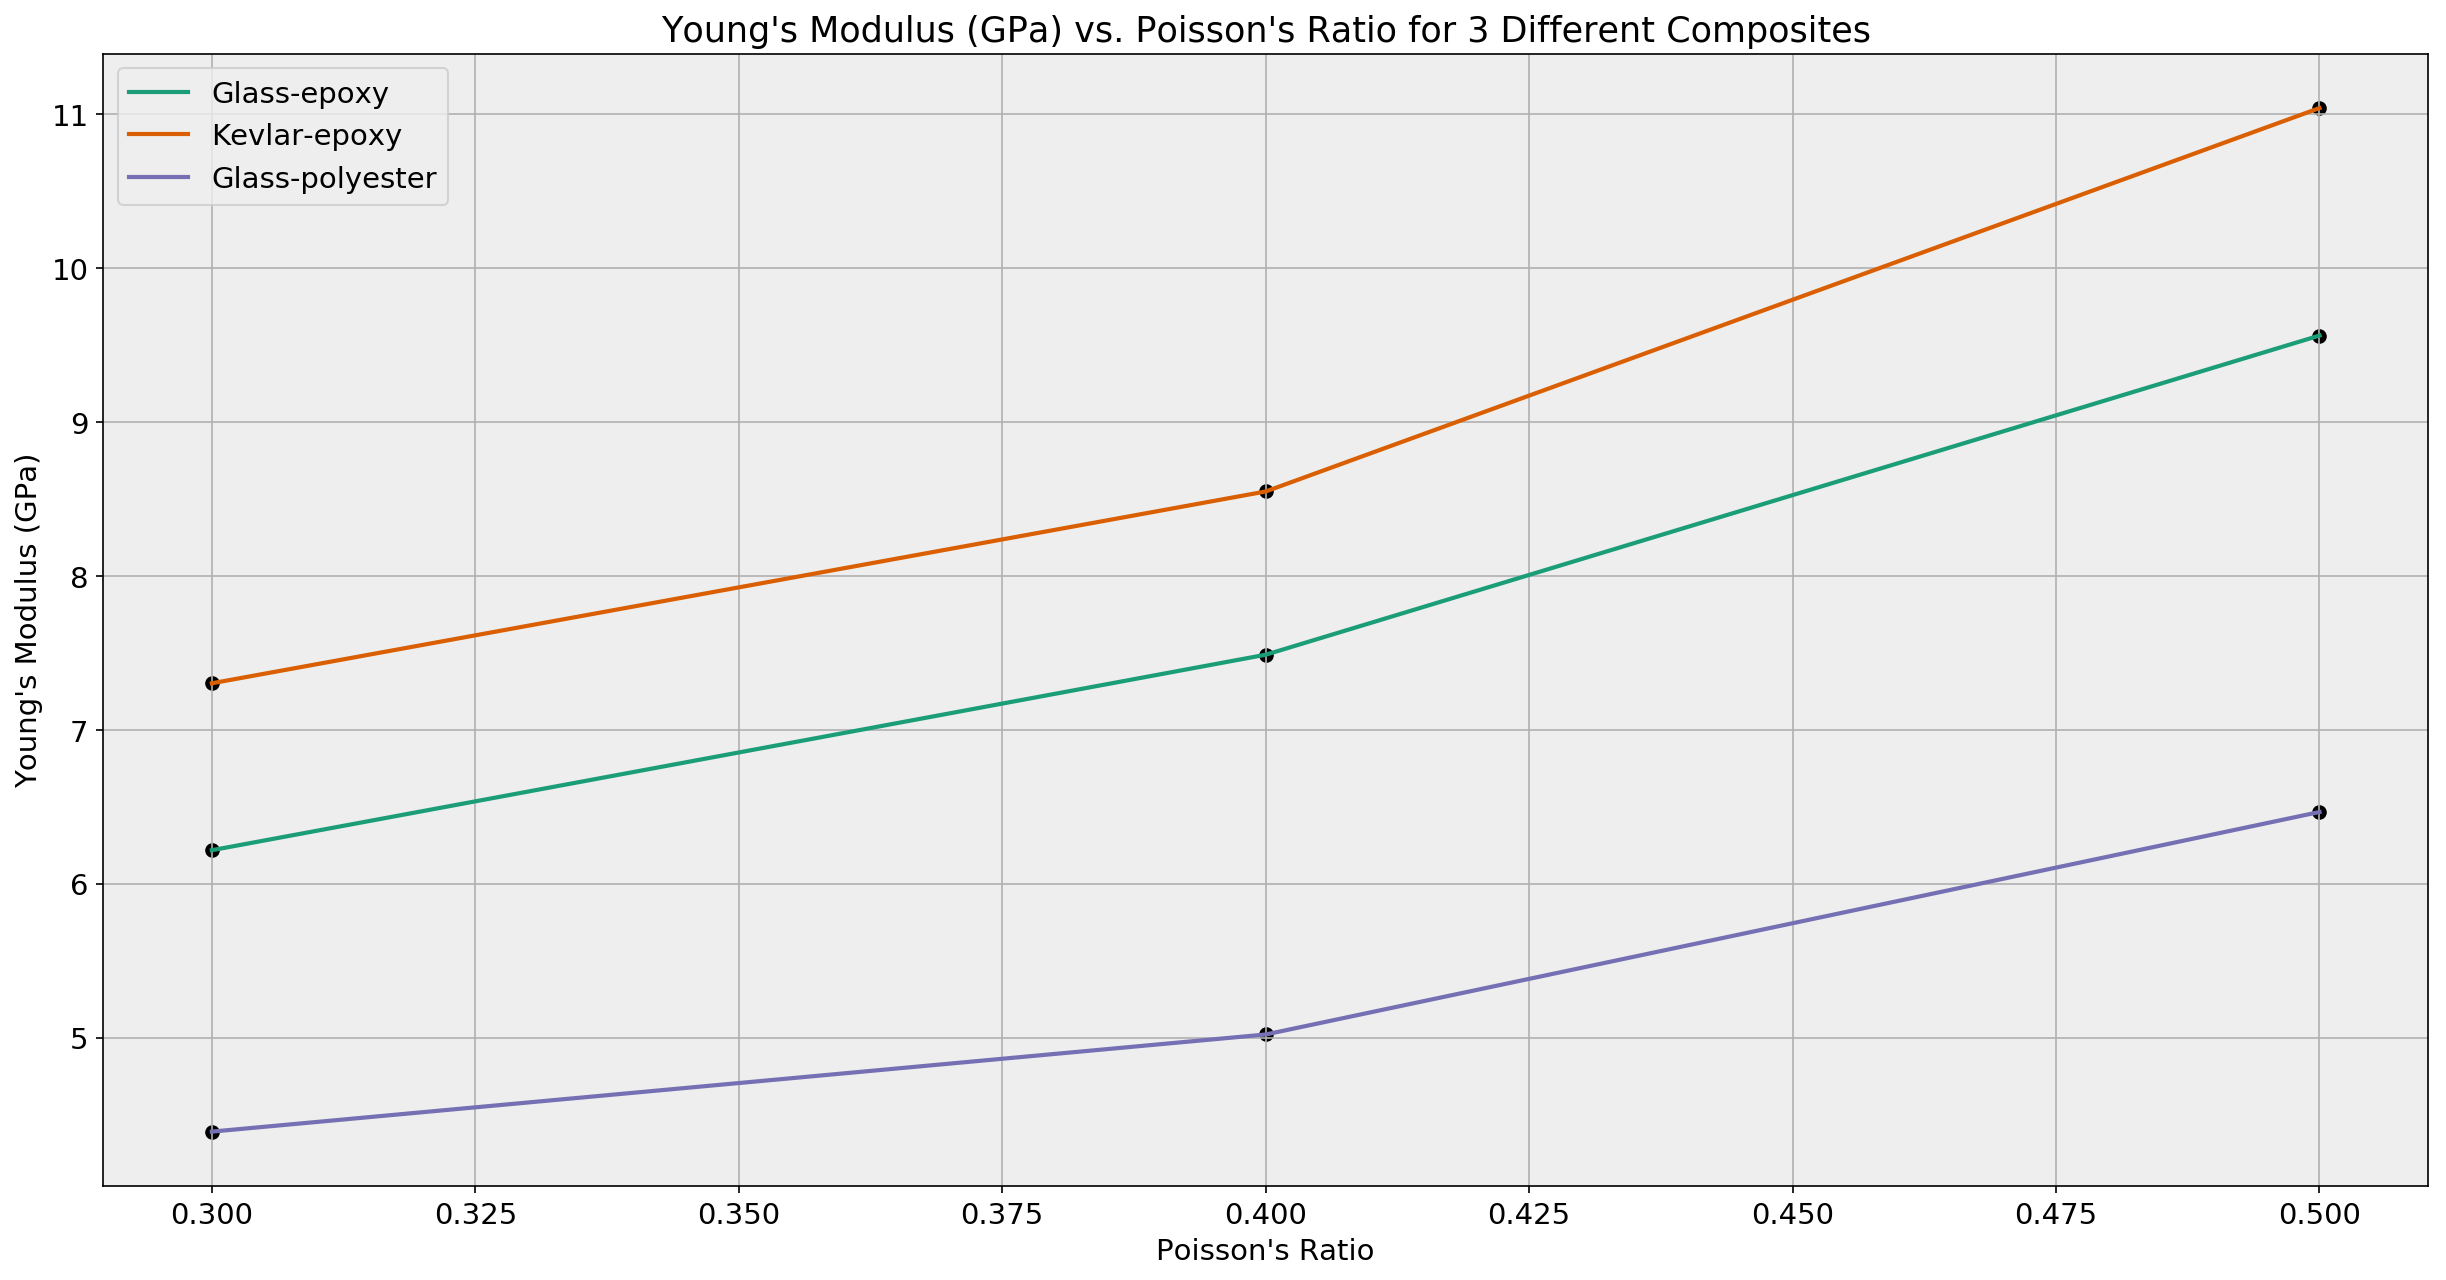

In [24]:
for i in range(0, 9, 3):
    plt.plot(a['phi'][i:i+3], a['E'][i:i+3])
plt.legend(composites[0])
plt.scatter(a['phi'], a['E'], color='black')
plt.xlabel("Poisson's Ratio")
plt.ylabel("Young's Modulus (GPa)")
plt.title("Young's Modulus (GPa) vs. Poisson's Ratio for 3 Different Composites")
plt.show()